In [20]:
import pandas as pd
import numpy as np
#import sidetable as stb
import matplotlib.pyplot as plt
import seaborn as sns

## Limpieza 3: Valores extremos

In [21]:
plt.rcParams['figure.figsize'] = (16, 8)

In [22]:
df= pd.read_csv('datos/Limpieza-2.csv')
df.head(3)

,year,type,country,activity,age,species,month,fatal,sex
0,2018,Boating,usa,Paddling,57.0,White Shark,Jun,N,F
1,2018,Unprovoked,brazil,Swimming,18.0,Tiger Shark,Jun,Y,M
2,2018,Unprovoked,usa,Walking,15.0,Bull Shark,May,N,M


#### Ya hemos limpiado todas las columnas que parecía que no tenían el tipo de dato que queríamos o que tenían demasiada información. Por lo tanto, en este ejercicio tendremos que limpiar los outliers.

- ¿Sobre qué columnas podremos eliminar o reemplazar los outliers?

In [23]:
#vamos a revisar las columnas con valores numéricos
df_numericos = df.select_dtypes(include=np.number)
print(f'Las columnas sobre las que se pueden sacar outliers son {df_numericos.columns}')

Las columnas sobre las que se pueden sacar outliers son Index(['year', 'age'], dtype='object')


In [24]:
df_numericos['age'].unique()

array([57., 18., 15., 32., 21., 30., 60., 33., 19., 25., 10., 69., 55.,
       35., 20., 54., 22., 31., 40., 37., 11., 13., 34., 50., 46., 48.,
       17., 28., 65., 73., 58., 36., 51., 61., 59., 42.,  6., 27., 23.,
       29., 39., 24., 12., 26., 71., 43.,  9., 44., 14., 62., 52., 38.,
       68., 16., 47., 63., 70., 41., 53.,  7., 66., 45., 74., 64.,  8.,
       56., 49., nan, 77., 84.,  5., 67.])

- Identifica visualmente los outliers.

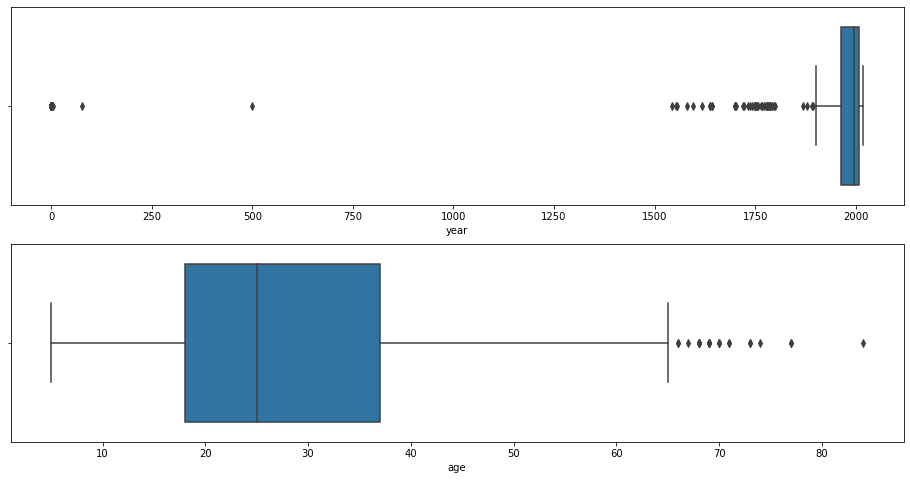

In [25]:
fig, ax = plt.subplots(2,1)

for col in range(len(df_numericos.columns)):
    sns.boxplot(x=df_numericos.columns[col], data=df_numericos, ax=ax[col])
plt.show();


- Identifica sobre el dataframe las filas que son outliers.

In [26]:
def patata (col, df):
    dict_outliers = {}

    for x in col:
        q3, q1 = np.nanpercentile(df[x], [75, 25])

        iqr = q3 - q1

        out_max = q3 + 1.5*iqr
        out_low = q1 - 1.5*iqr

        outliers_data = df[df[x] < out_low | df[x] > out_max]

        if outliers_data.shape[0] > 0:
            dict_outliers[x] = (list(outliers_data.index))
    return dict_outliers


In [27]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {}
    
    for col in lista_columnas:
        
        q3, q1 = np.nanpercentile(df[col], [75, 25])
        
        IQR = q3 - q1
        
        outlier_step = 1.5 * IQR
        
        outliers_data = dataframe[(dataframe[col] < q1 - outlier_step) | (dataframe[col] > q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0:
        
            dicc_indices[col] = (list(outliers_data.index))
        

    
    return dicc_indices 

In [28]:
indices = detectar_outliers(df_numericos.columns, df_numericos)

In [29]:
outliers_age = list(indices['age'])
outliers_year = list(indices['year'])

In [30]:
indices.values()

dict_values([[1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 16

- Reemplaza los outliers por el estadístico más correcto.

In [31]:
#generamos un for loop para reemplazar los valores atípicos de 'age':
for i in outliers_age:
    df.replace(df_numericos.loc[i,'age'], df_numericos['age'].median(), inplace=True)

In [32]:
#ídem con los valores de year
for i in outliers_year:
    df.replace(df_numericos.loc[i,'year'], df_numericos['year'].median(), inplace=True)

In [33]:
print('La mediana de la columna age es de', int(df_numericos['age'].median()), 'años')
print('La mediana de la columna year es el año', int(df_numericos['year'].median()))

La mediana de la columna age es de 25 años
La mediana de la columna year es el año 1997


In [34]:
#comprobamos los cambios en la columna de age:
df['age'].value_counts()

25.0      82
19.0      71
18.0      61
20.0      60
15.0      57
          ..
59.0       4
62.0       3
65.0       2
64.0       1
1997.0     1
Name: age, Length: 61, dtype: int64

In [35]:
#comprobamos los cambios en la columna de year:
df['year'].value_counts()

1997    192
2015     68
2007     57
2012     54
2002     53
       ... 
1912      1
1906      1
1905      1
1901      1
25        1
Name: year, Length: 102, dtype: int64

In [36]:
df.head()

,year,type,country,activity,age,species,month,fatal,sex
0,2018,Boating,usa,Paddling,57.0,White Shark,Jun,N,F
1,2018,Unprovoked,brazil,Swimming,18.0,Tiger Shark,Jun,Y,M
2,2018,Unprovoked,usa,Walking,15.0,Bull Shark,May,N,M
3,2018,Provoked,australia,Feeding sharks,32.0,Grey Shark,May,N,M
4,2018,Invalid,england,Fishing,21.0,Unspecified,May,N,M


- Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza.

In [37]:
df.to_csv('datos/Limpieza-3.csv')